지프의 법칙(Zipf's law)은 수학적 통계를 바탕으로 밝혀진 경험적 법칙으로, 물리 및 사회 과학 분야에서 연구된 많은 종류의 정보들이 지프 분포에 가까운 경향을 보인다는 것을 뜻한다. 지프 분포는 이산 멱법칙 확률분포와 관계된 확률분포의 하나이다.

In [14]:
from collections import Counter

from konlpy.corpus import kolaw
from konlpy.tag import Hannanum
from konlpy.utils import concordance, pprint
import matplotlib.pyplot as plt
from konlpy.utils import pprint
from nltk import collocations

In [2]:
def draw_zipf(count_list, filename, color='blue', marker='o'):
    sorted_list = sorted(count_list, reverse=True)
    plt.plot(sorted_list, color=color, marker=marker)
    plt.xscale('log')
    plt.yscale('log')
    plt.savefig(filename)

In [3]:
doc = kolaw.open('constitution.txt').read()
pos = Hannanum().pos(doc)
cnt = Counter(pos)

C:\Users\EZEN\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [4]:
print('nchars  :', len(doc))
print('ntokens :', len(doc.split()))
print('nmorphs :', len(set(pos)))
print('\nTop 20 frequent morphemes:'); pprint(cnt.most_common(20))
print('\nLocations of "대한민국" in the document:')
concordance(u'대한민국', doc, show=True)

nchars  : 18884
ntokens : 4178
nmorphs : 1499

Top 20 frequent morphemes:
[(('의', 'J'), 396),
 (('.', 'S'), 340),
 (('하', 'X'), 291),
 (('에', 'J'), 283),
 (('ㄴ다', 'E'), 241),
 (('ㄴ', 'E'), 223),
 (('이', 'J'), 221),
 (('을', 'J'), 211),
 (('은', 'J'), 184),
 (('어', 'E'), 176),
 (('를', 'J'), 148),
 (('ㄹ', 'E'), 134),
 (('하', 'P'), 124),
 (('는', 'J'), 117),
 (('법률', 'N'), 115),
 ((',', 'S'), 99),
 (('는', 'E'), 97),
 (('있', 'P'), 96),
 (('되', 'X'), 94),
 (('수', 'N'), 91)]

Locations of "대한민국" in the document:
0	대한민국헌법 유구한 역사와
9	대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에
98	총강 제1조 ① 대한민국은 민주공화국이다. ②대한민국의
100	① 대한민국은 민주공화국이다. ②대한민국의 주권은 국민에게
110	나온다. 제2조 ① 대한민국의 국민이 되는
126	의무를 진다. 제3조 대한민국의 영토는 한반도와
133	부속도서로 한다. 제4조 대한민국은 통일을 지향하며,
147	추진한다. 제5조 ① 대한민국은 국제평화의 유지에
787	군무원이 아닌 국민은 대한민국의 영역안에서는 중대한
1836	파견 또는 외국군대의 대한민국 영역안에서의 주류에
3620	경제 제119조 ① 대한민국의 경제질서는 개인과


[0, 9, 98, 100, 110, 126, 133, 147, 787, 1836, 3620]

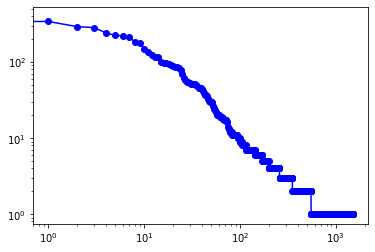

In [6]:
draw_zipf(cnt.values(), '13.zipf.png')

# 말뭉치 탐색하기

말뭉치의 크기를 늘려갈수록 등장하는 토큰의 개수가 로그함수적으로 늘어간다는 힙의 법칙(Heap's Law) 을 관찰하는 방법

In [13]:
from konlpy.corpus import kobill
from konlpy.tag import Okt
t = Okt()

In [8]:
pos = lambda x: ['/'.join(p) for p in t.pos(x)]
docs = [kobill.open(i).read() for i in kobill.fileids()]

In [9]:
print(kobill.fileids())

['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt', '1809895.txt', '1809896.txt', '1809897.txt', '1809898.txt', '1809899.txt']


In [10]:
# get global unique token counts
global_unique = []
global_unique_cnt = []
for doc in docs:
    tokens = pos(doc)
    unique = set(tokens)
    global_unique += list(unique)
    global_unique = list(set(global_unique))
    global_unique_cnt.append(len(global_unique))
    print(len(unique), len(global_unique))

504 504
498 507
540 587
508 637
201 723
282 845
651 1200
416 1429
428 1540
547 1749


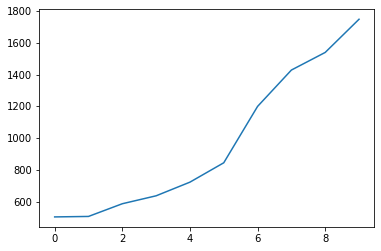

In [12]:
# draw heap
plt.plot(global_unique_cnt)
plt.savefig('14.heap.png')

# 연어찾기

In [17]:
from konlpy.tag import Kkma

In [15]:
measures = collocations.BigramAssocMeasures()
doc = kolaw.open('constitution.txt').read()

In [18]:
print('\nCollocations among tagged words:')
tagged_words = Kkma().pos(doc)
finder = collocations.BigramCollocationFinder.from_words(tagged_words)
pprint(finder.nbest(measures.pmi, 10)) # top 5 n-grams with highest PMI


Collocations among tagged words:
[(('가부', 'NNG'), ('동수', 'NNG')),
 (('강제', 'NNG'), ('노역', 'NNG')),
 (('경자', 'NNG'), ('유전', 'NNG')),
 (('고', 'ECS'), ('채취', 'NNG')),
 (('공무', 'NNG'), ('담임', 'NNG')),
 (('공중', 'NNG'), ('도덕', 'NNG')),
 (('과반', 'NNG'), ('수가', 'NNG')),
 (('교전', 'NNG'), ('상태', 'NNG')),
 (('그러', 'VV'), ('나', 'ECE')),
 (('기본적', 'NNG'), ('인권', 'NNG'))]


In [19]:
print('\nCollocations among words:')
words = [w for w, t in tagged_words]
ignored_words = [u'안녕']
finder = collocations.BigramCollocationFinder.from_words(words)
finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(3) # only bigrams that appear 3+ times
pprint(finder.nbest(measures.pmi, 10))


Collocations among words:
[('현행', '범인'),
 ('형의', '선고'),
 ('내부', '규율'),
 ('정치적', '중립성'),
 ('누구', '든지'),
 ('회계', '연도'),
 ('지체', '없이'),
 ('평화적', '통일'),
 ('형사', '피고인'),
 ('지방', '자치')]


In [20]:
print('\nCollocations among tags:')
tags = [t for w, t in tagged_words]
finder = collocations.BigramCollocationFinder.from_words(tags)
pprint(finder.nbest(measures.pmi, 5))


Collocations among tags:
[('XR', 'XSA'), ('JKC', 'VCN'), ('EPT', 'EPT'), ('VCN', 'ECD'), ('ECD', 'VX')]
